In [2]:
!pip install qiskit qiskit-aer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.4 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a7bb0c7480441377ff10f5035b1dd306a450398d8031a7125b31fa998d432f67
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [5]:
# Apply Heisenberg interaction to a pair of qubits
def apply_heisenberg_pair(qc, q1, q2, theta):
    # XX interaction
    qc.h(q1)
    qc.h(q2)
    qc.cx(q1, q2)
    qc.rz(2 * theta, q2)
    qc.cx(q1, q2)
    qc.h(q1)
    qc.h(q2)

    # YY interaction
    qc.rx(-np.pi/2, q1)
    qc.rx(-np.pi/2, q2)
    qc.cx(q1, q2)
    qc.rz(2 * theta, q2)
    qc.cx(q1, q2)
    qc.rx(np.pi/2, q1)
    qc.rx(np.pi/2, q2)

    # ZZ interaction
    qc.cx(q1, q2)
    qc.rz(2 * theta, q2)
    qc.cx(q1, q2)


In [6]:
"""2 spin heisenberg model"""
def two_spin_heisenberg(theta):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.h(1)
    apply_heisenberg_pair(qc, 0, 1, theta)
    qc.measure_all()
    return qc

In [7]:
# Simulate for multiple theta (time) values
backend = Aer.get_backend("qasm_simulator")
thetas = np.linspace(0, np.pi, 9)
all_counts = {}

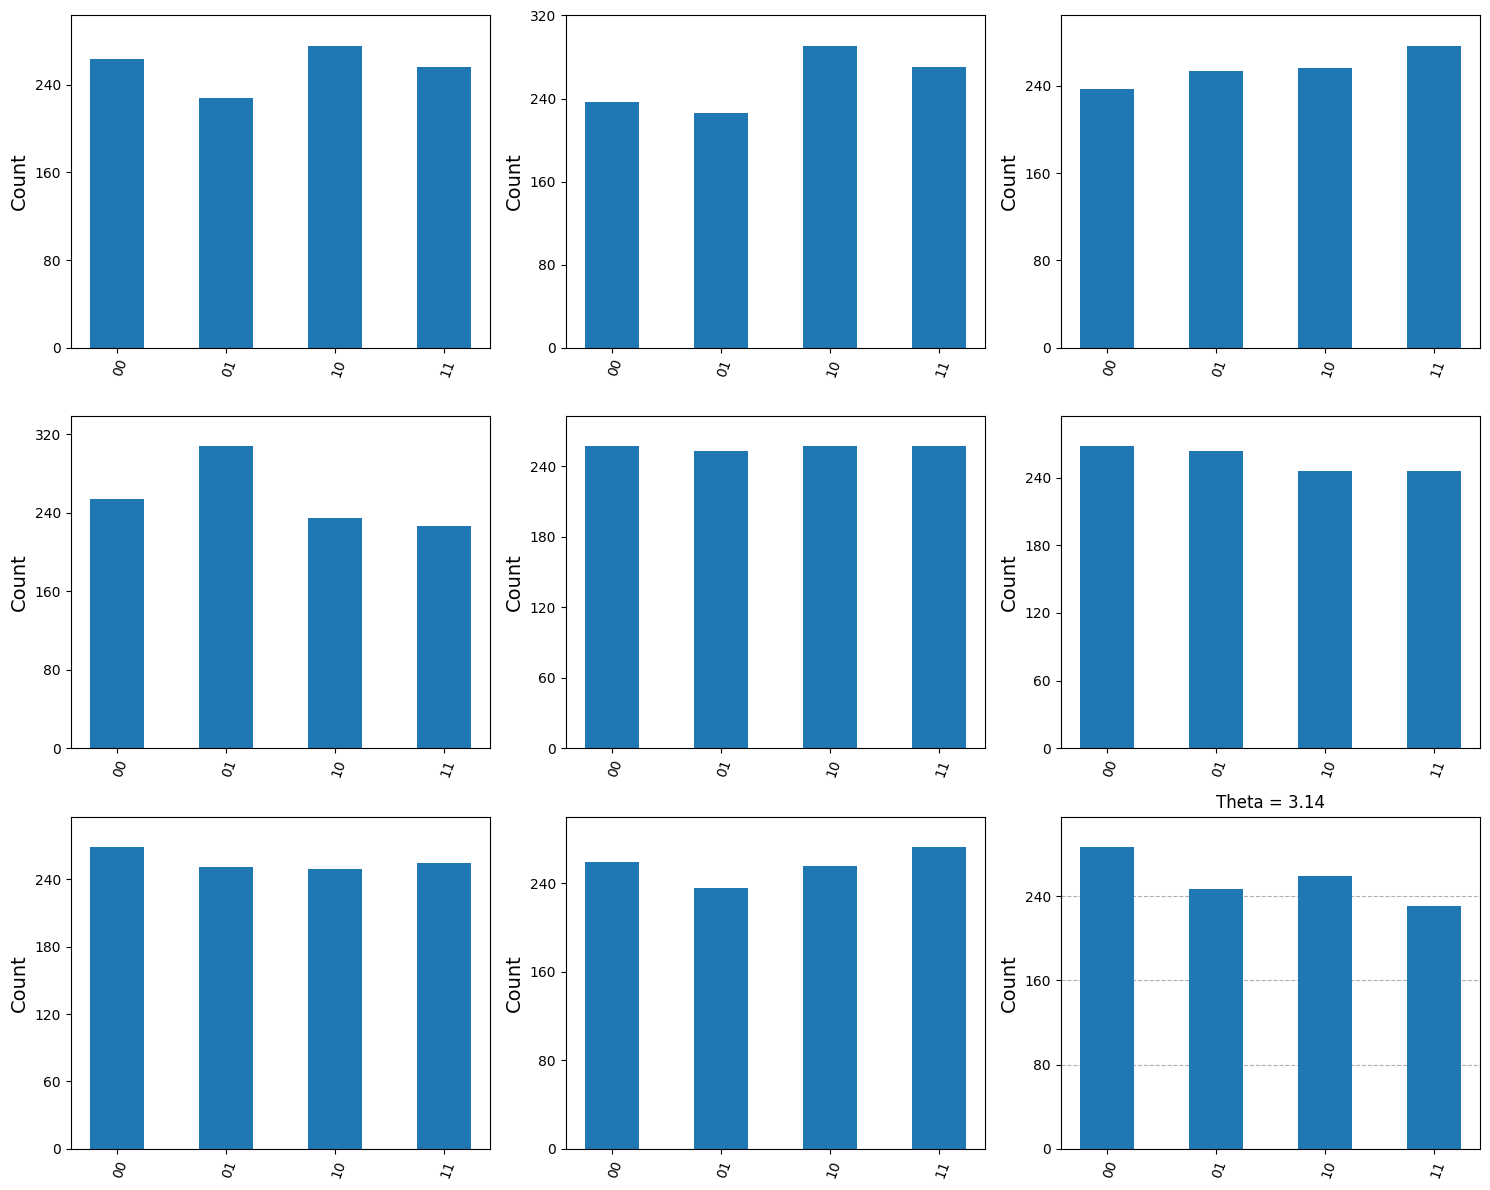

In [11]:
"""changing theta will change time hence plotting theta from 0 to pi"""
for theta in thetas:
    qc = two_spin_heisenberg(theta)
    result = backend.run(transpile(qc, backend), shots=1024).result()
    counts = result.get_counts()
    all_counts[np.round(theta, 2)] = counts

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for ax, (theta, counts) in zip(axes.flatten(), all_counts.items()):
    plot_histogram(counts, ax=ax, title=f"Theta = {theta:.2f}", bar_labels=False)
    plt.show

    plt.tight_layout()
plt.show()